In [17]:
import cv2
cap = cv2.VideoCapture(r"C:\Users\acer\cv_assignment\task2_input_video\1721303-hd_1920_1080_25fps.mp4")
frame_count = 0
frames_to_process = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count % 3 == 0:
        frames_to_process.append((frame_count, frame))
    frame_count += 1
cap.release()

In [28]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

100%|██████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:17<00:00, 377kB/s]


In [ ]:
output = {}
for frame_id, frame in frames_to_process:
    results = model(frame)[0]  # This is a Result object
    
    detections = []
    for box in results.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()       # Bounding box
        confidence = box.conf[0].item()             # Confidence
        class_id = int(box.cls[0].item())           # Class ID
        class_name = model.names[class_id]          # Class name

        detections.append({
            'confidence': round(confidence, 3),
            'bbox': [x1, y1, x2, y2],
            'class': class_name
        })

    output[f'frame_{frame_id}'] = {'detections': detections}

In [20]:
people_counts = []
alert_log = []
for frame_id, frame_date in output.items():
    detections = frame_date['detections']
    num_people = sum(1 for det in detections if det['class'] == 'person')
    people_counts.append((frame_id, num_people))
    if len(people_counts) >= 5:
        recent_counts = people_counts[-5:]
        if all(count[1] >= 3 for count in recent_counts):
            alert_log.append({'frame': frame_id, 'alert': 'Crowd Detected'})


In [21]:
import json
with open(r"C:\Users\acer\cv_assignment\task2_outputs\alerts.json", 'w') as f:
    json.dump(alert_log, f, indent=4)

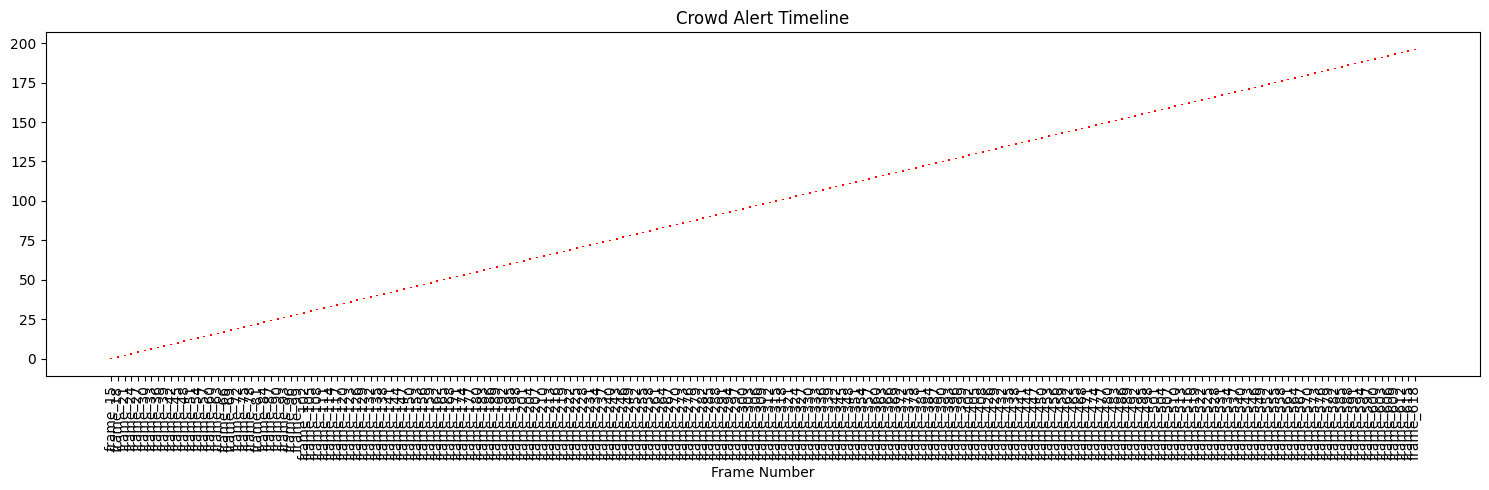

In [27]:
import matplotlib.pyplot as plt
alert_frames = [entry['frame'] for entry in alert_log]
plt.figure(figsize=(15, 5))
plt.eventplot(alert_frames, orientation='horizontal', colors='red')
plt.xlabel('Frame Number')
plt.title('Crowd Alert Timeline')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(r"C:\Users\acer\cv_assignment\task2_outputs\alert_timeline.png")
plt.show()